## 图像读取

In [1]:
import cv2 # 读取格式BGR
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

img  = cv2.imread('data/Beauitful.png')
img

array([[[67, 39, 26],
        [65, 37, 24],
        [64, 37, 23],
        ...,
        [70, 41, 25],
        [69, 40, 24],
        [70, 41, 25]],

       [[65, 38, 24],
        [64, 37, 23],
        [63, 36, 22],
        ...,
        [70, 41, 26],
        [69, 41, 25],
        [70, 41, 25]],

       [[64, 37, 23],
        [64, 36, 23],
        [63, 36, 22],
        ...,
        [73, 44, 28],
        [72, 43, 27],
        [71, 42, 26]],

       ...,

       [[34, 15, 11],
        [34, 14, 11],
        [30, 11,  7],
        ...,
        [26, 12,  7],
        [26, 12,  7],
        [26, 12,  7]],

       [[33, 14, 10],
        [32, 13,  9],
        [29, 10,  6],
        ...,
        [25, 10,  6],
        [25, 10,  6],
        [25, 10,  6]],

       [[33, 14, 10],
        [31, 12,  8],
        [28,  9,  6],
        ...,
        [25, 11,  6],
        [25, 11,  6],
        [25, 11,  6]]], dtype=uint8)

In [3]:
# 创建一个窗口的图像显示，也可以创建多个窗口
cv2.imshow('image',img)
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
def cv_show(name, img):
    cv2.imshow(name, img)  # 显示图片
    cv2.waitKey(0)  # 等待按键
    cv2.destroyAllWindows()  # 关闭所有窗口

In [4]:
img.shape

(743, 1574, 3)

**灰度图** cv2.IMREAD_GRAYSCALE 
**彩色图** cv2.IMREAD_

In [5]:
img = cv2.imread('data/Beauitful.png',cv2.IMREAD_GRAYSCALE)
img,img.shape

(array([[38, 36, 35, ..., 39, 38, 39],
        [36, 35, 34, ..., 39, 39, 39],
        [35, 35, 34, ..., 42, 41, 40],
        ...,
        [15, 15, 11, ..., 12, 12, 12],
        [14, 13, 10, ..., 10, 10, 10],
        [14, 12, 10, ..., 11, 11, 11]], dtype=uint8),
 (743, 1574))

In [8]:
cv_show('data/Beauitful.png',img)

### 保存图像

In [10]:
cv2.imwrite('data/Beautiful_1.png',img)

True

In [11]:
type(img)

numpy.ndarray

## 数据读取——视频

In [23]:
vc = cv2.VideoCapture('data/test.mp4')
# 检查是否打开正确
if vc.isOpened():
    open,frame = vc.read()
else:
    open = False

In [25]:
while open:
    ret,frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # 灰度视频
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [27]:
img = cv2.imread('data/Beauitful.png')
img1 = img[0:200,0:200]
cv_show('img',img1)

### 颜色通道提取

In [30]:
b,g,r = cv2.split(img)
b,b.shape

(array([[67, 65, 64, ..., 70, 69, 70],
        [65, 64, 63, ..., 70, 69, 70],
        [64, 64, 63, ..., 73, 72, 71],
        ...,
        [34, 34, 30, ..., 26, 26, 26],
        [33, 32, 29, ..., 25, 25, 25],
        [33, 31, 28, ..., 25, 25, 25]], dtype=uint8),
 (743, 1574))

In [32]:
img = cv2.merge((b,g,r))
img.shape

(743, 1574, 3)

In [34]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0 # B 通道为0
cur_img[:,:,1] = 0 # G 通道为0
cv_show('R',cur_img)

In [36]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0 # B 通道为0
cur_img[:,:,2] = 0 # R 通道为0
cv_show('G',cur_img)

In [37]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0 # G 通道为0
cur_img[:,:,2] = 0 # R 通道为0
cv_show('G',cur_img)

## 边界填充

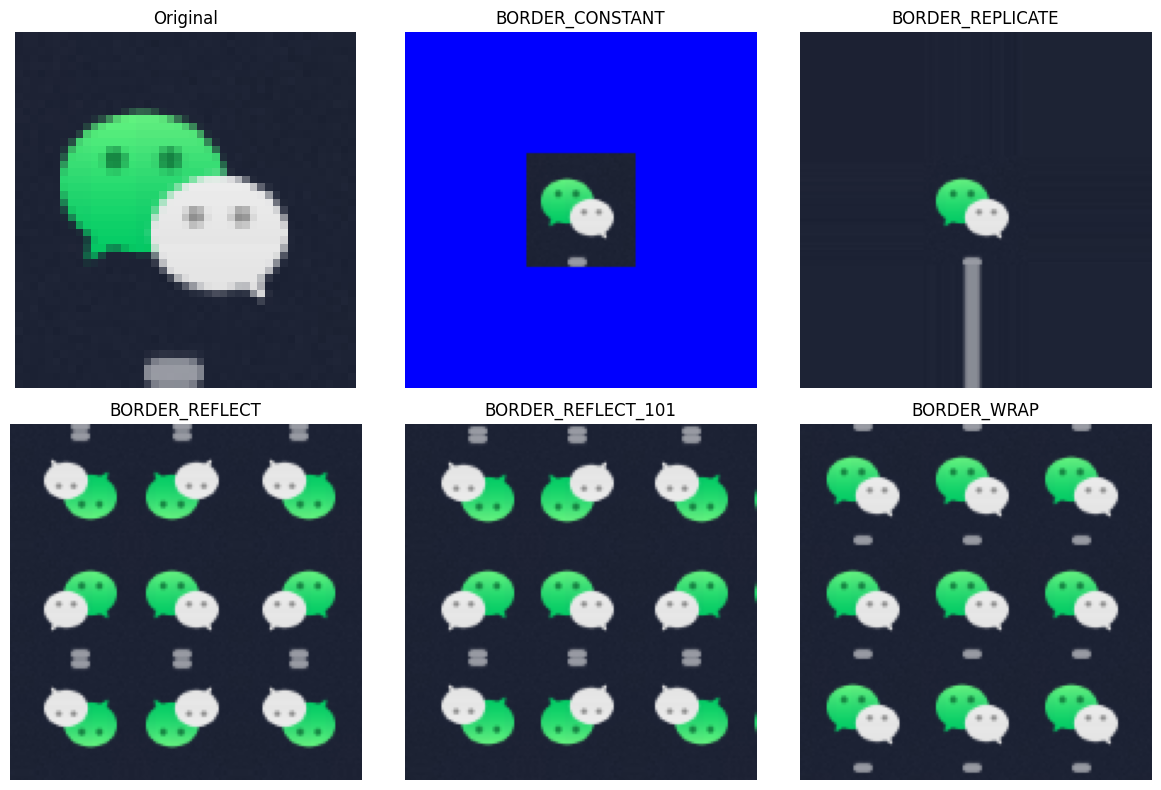

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('data/WeiChat.png')

# 检查图像是否成功读取
if img is None:
    print("Error: Image not found or cannot be opened!")
else:
    # 定义填充大小
    top, bottom, left, right = 50, 50, 50, 50

    # 常量填充（蓝色）
    constant = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 0, 0])

    # 重复边界像素填充
    replicate = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)

    # 镜像反射填充
    reflect = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT)

    # 默认镜像反射填充
    reflect_101 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT_101)

    # 另一侧像素填充
    wrap = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_WRAP)

    # 显示结果
    plt.figure(figsize=(12, 8))

    titles = ['Original', 'BORDER_CONSTANT', 'BORDER_REPLICATE', 'BORDER_REFLECT', 'BORDER_REFLECT_101', 'BORDER_WRAP']
    images = [img, constant, replicate, reflect, reflect_101, wrap]

    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # 转换为RGB显示
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


## 数值计算

In [ ]:
img_1 = cv2.imread('data/Beautifrl.png')
img_2 = cv2.imread('')
img_11 = img_1 + 10
img_11[:5,:,0]